[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/niteshjindal170988/unsupervised-learning/blob/main/dimensionality-reduction/higgs_boson_features_visualization.ipynb)

In this lesson, we will look through the  [Higgs Boson Dataset](https://www.kaggle.com/competitions/higgs-boson/data) and plot the individual features to understand their data distribution and skewness. 
<br>
We will see how the log transformation (a non-linear transformation) helps minimise the skewness and brings the distribution closer to the normal distribution. Many algorithms perform poorly if the distribution of the data is not a normal distribution. Additionally, we can apply techniques, such as Standardisation when the distribution is normal. 
<br>
For all these reasons, it becomes important for us to normalise data, and we will see how to do it through an example in the following lesson.

# Imports 

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

# Download the Higgs Boson Dataset 

In [2]:
%pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org gdown==4.2.0
import gdown
warnings.filterwarnings("ignore")
# Load Higgs Boson Data 
url = 'https://drive.google.com/uc?id=1Xu5mHENHoiyUbVG_9Z1bza-N0JfutjaP'
output = 'training.csv'
gdown.download(url, output, quiet=False, verify=False)

You should consider upgrading via the '/home/nitesh/env/dev37/python37/bin/python3.7 -m pip install --upgrade pip' command.


Downloading...
From: https://drive.google.com/uc?id=1Xu5mHENHoiyUbVG_9Z1bza-N0JfutjaP
To: /home/nitesh/env/dev37/repos/unsupervised-learning/higgs-boson-features-visualization/training.csv
100%|██████████| 55.3M/55.3M [00:04<00:00, 12.0MB/s]


'training.csv'

# Read the training.csv data
There are 250000 observations and 33 features in the data. There are two unique labels, viz. "s" and "b".

In [3]:
higgsboson = pd.read_csv("training.csv")
display(higgsboson.shape) # shape of higgs boson data
display(higgsboson.head()) # top few rows of the higgs boson data
display(higgsboson.Label.unique())

(250000, 33)

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


array(['s', 'b'], dtype=object)

# Histogram Plots

we do not require "EventId" feature and "Label" features, therefore we will remove these features and plot rest other features from the dataset. 
<br>
## Feature Plot

Histogram plot of DER_mass_MMC


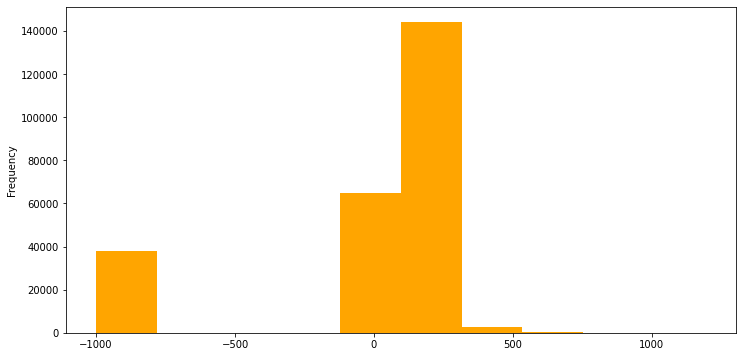

Histogram plot of DER_mass_transverse_met_lep


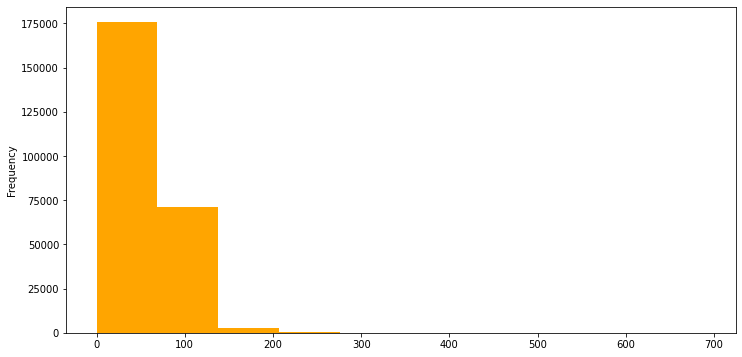

Histogram plot of DER_mass_vis


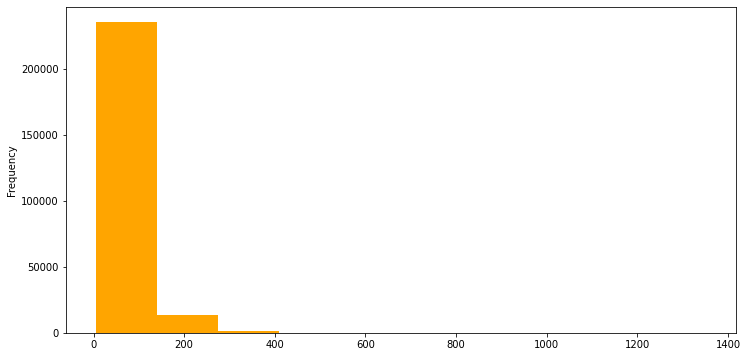

Histogram plot of DER_pt_h


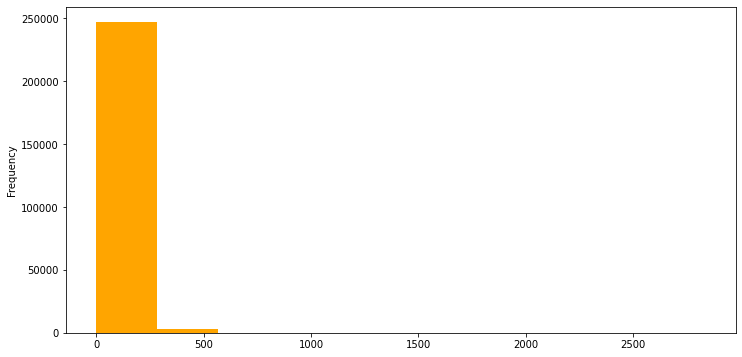

Histogram plot of DER_deltaeta_jet_jet


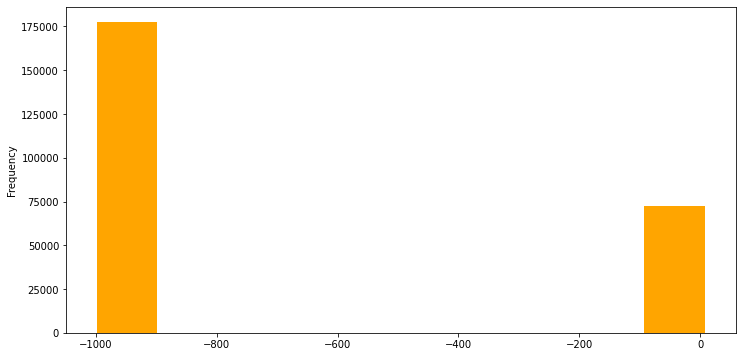

Histogram plot of DER_mass_jet_jet


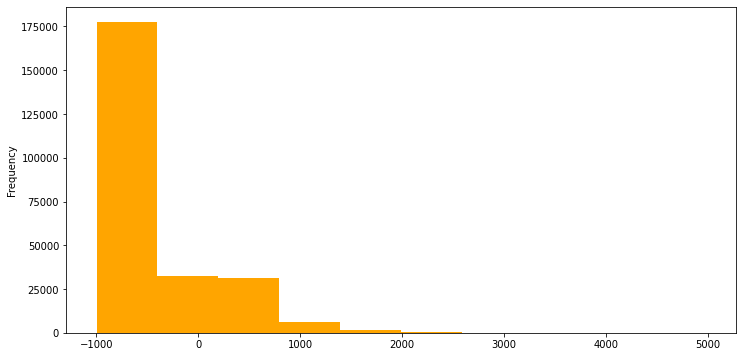

Histogram plot of DER_prodeta_jet_jet


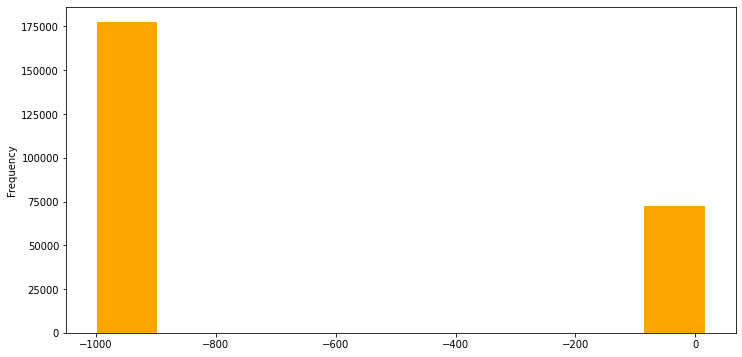

Histogram plot of DER_deltar_tau_lep


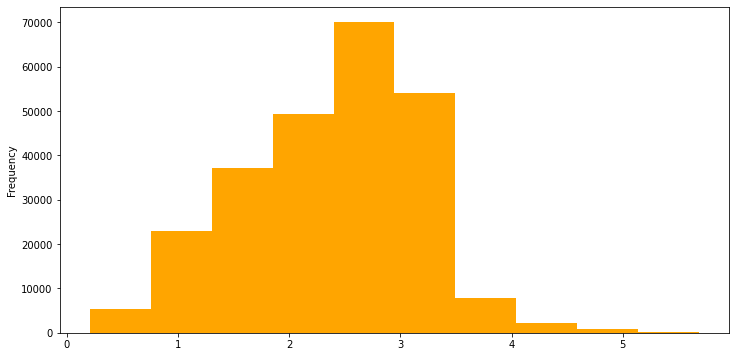

Histogram plot of DER_pt_tot


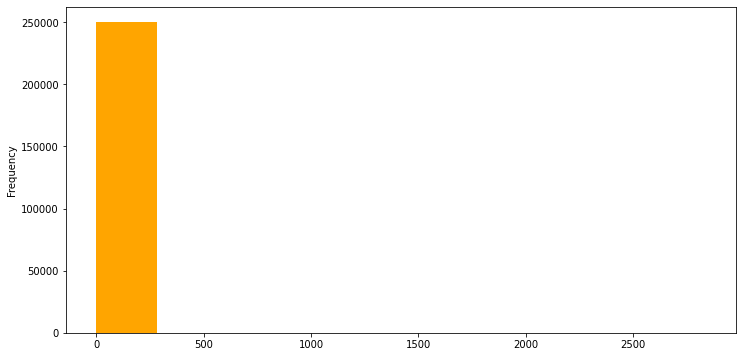

Histogram plot of DER_sum_pt


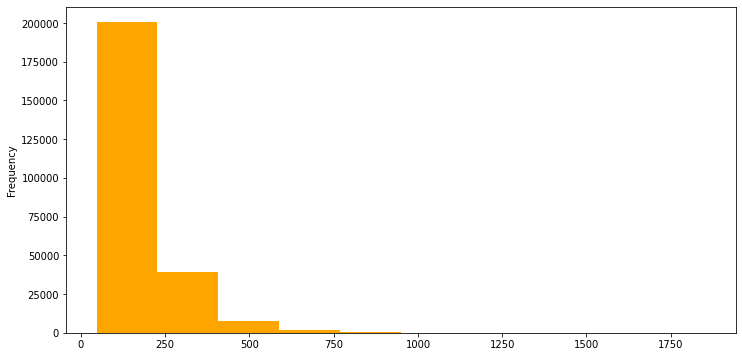

Histogram plot of DER_pt_ratio_lep_tau


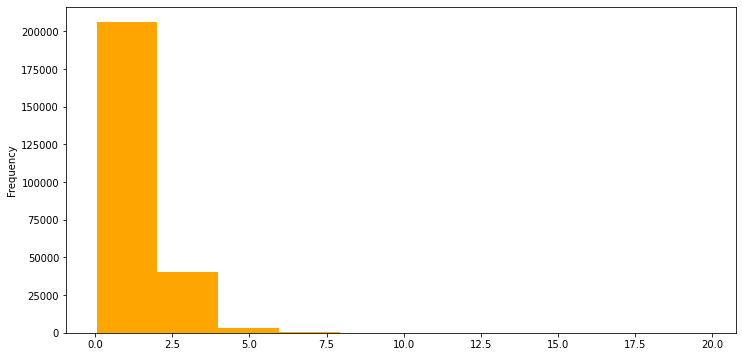

Histogram plot of DER_met_phi_centrality


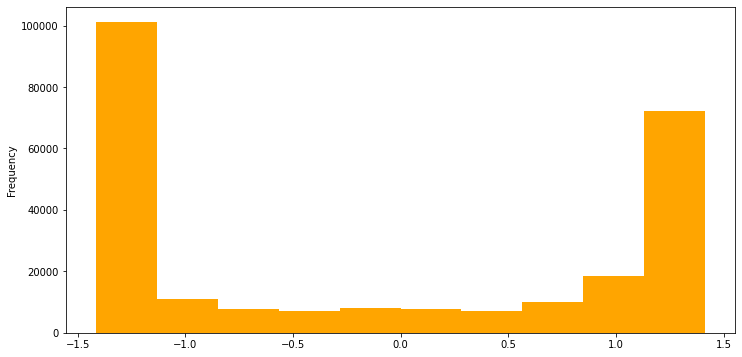

Histogram plot of DER_lep_eta_centrality


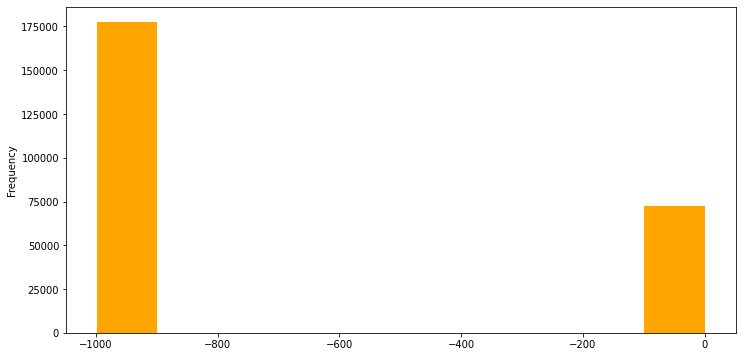

Histogram plot of PRI_tau_pt


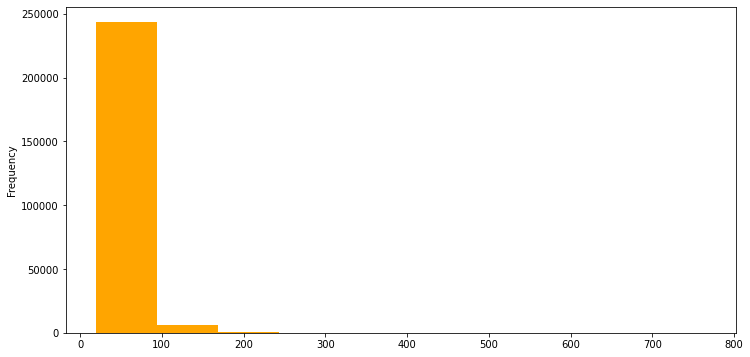

Histogram plot of PRI_tau_eta


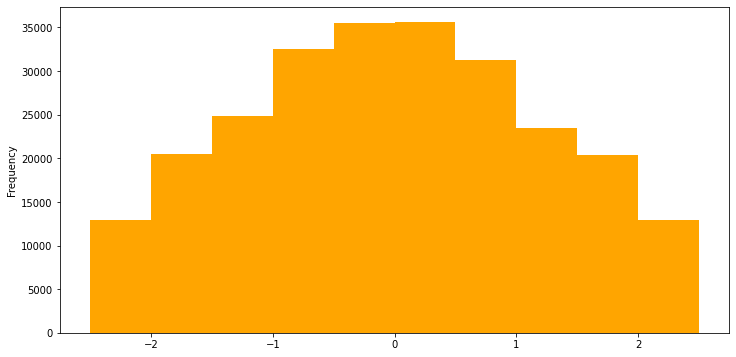

Histogram plot of PRI_tau_phi


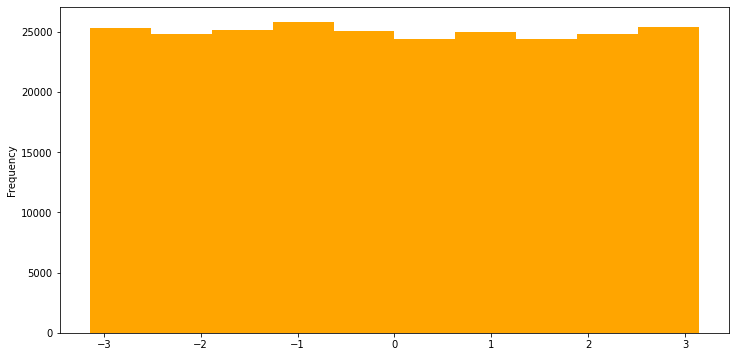

Histogram plot of PRI_lep_pt


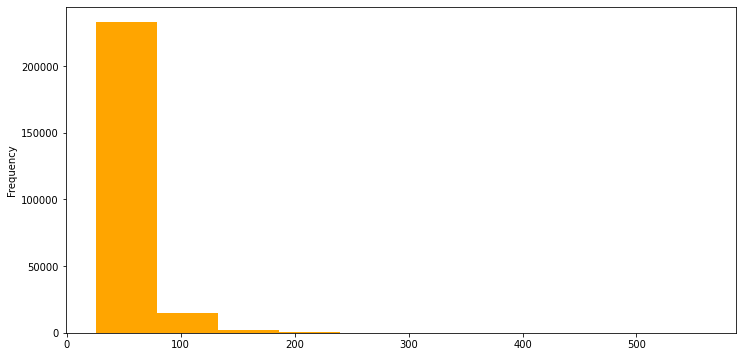

Histogram plot of PRI_lep_eta


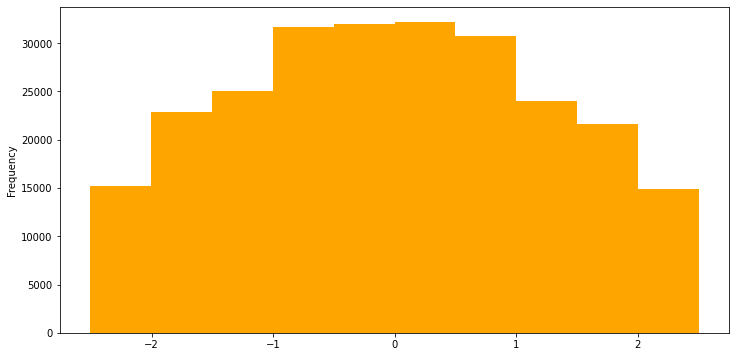

Histogram plot of PRI_lep_phi


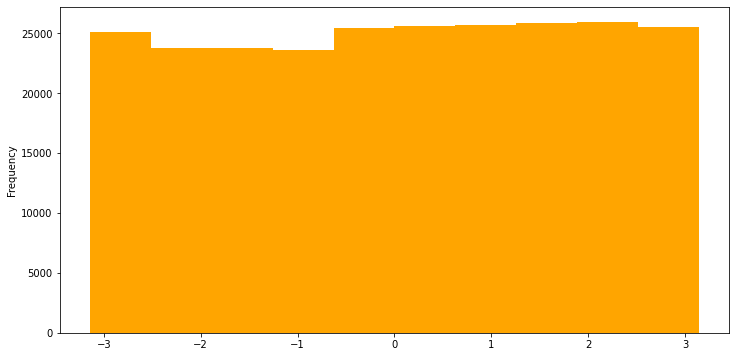

Histogram plot of PRI_met


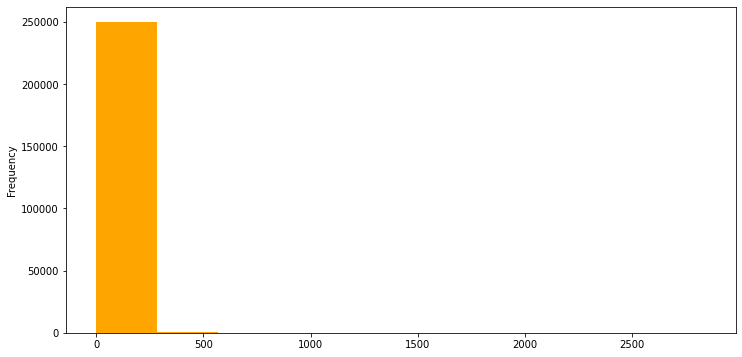

Histogram plot of PRI_met_phi


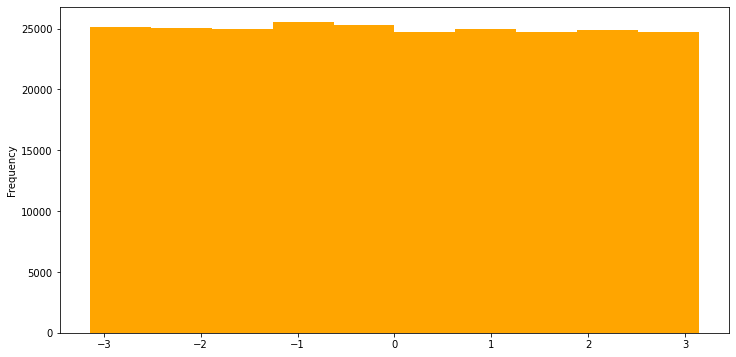

Histogram plot of PRI_met_sumet


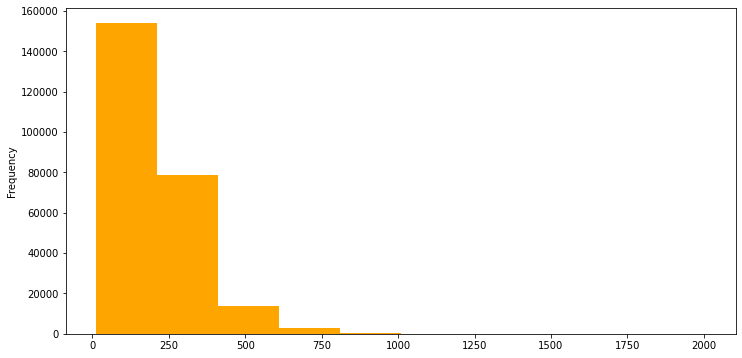

Histogram plot of PRI_jet_num


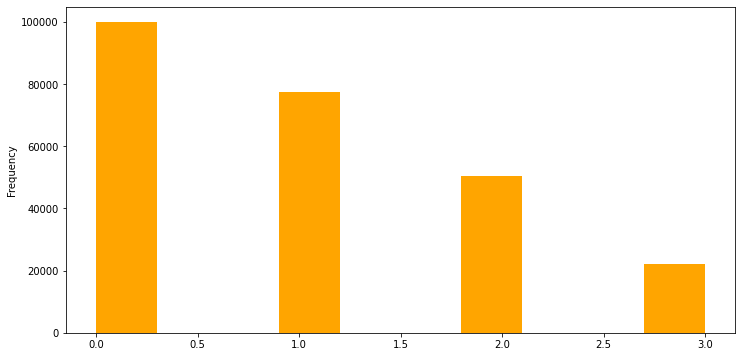

Histogram plot of PRI_jet_leading_pt


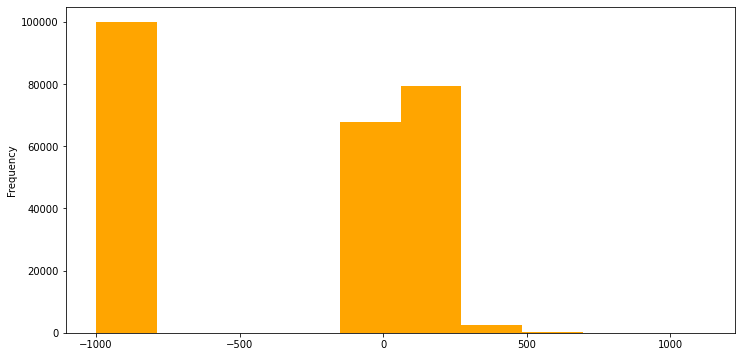

Histogram plot of PRI_jet_leading_eta


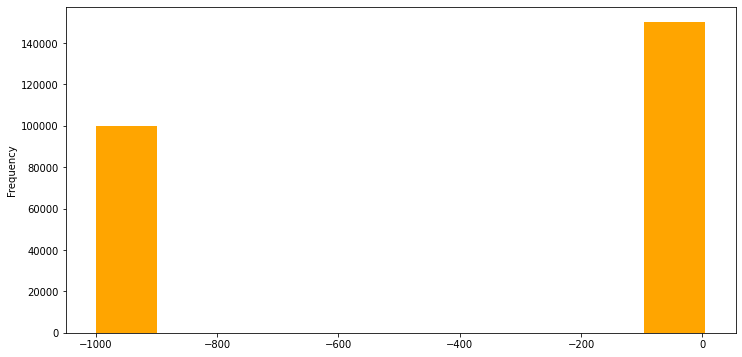

Histogram plot of PRI_jet_leading_phi


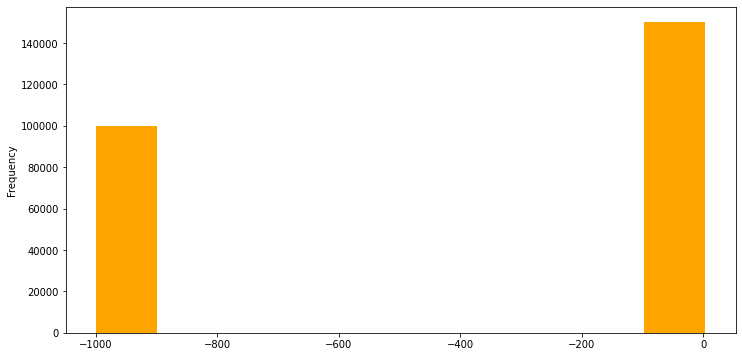

Histogram plot of PRI_jet_subleading_pt


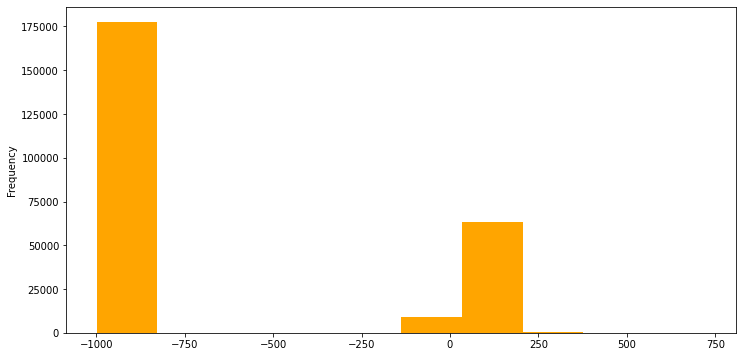

Histogram plot of PRI_jet_subleading_eta


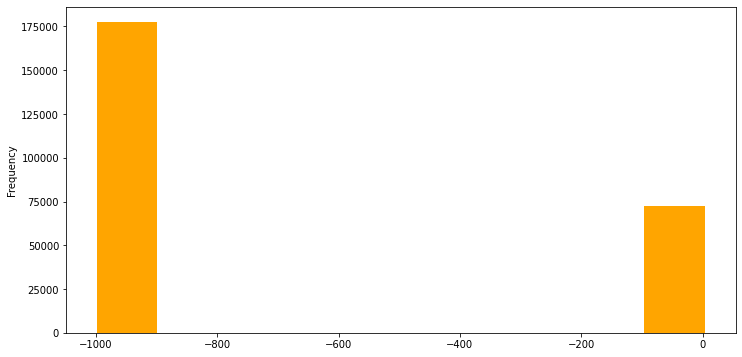

Histogram plot of PRI_jet_subleading_phi


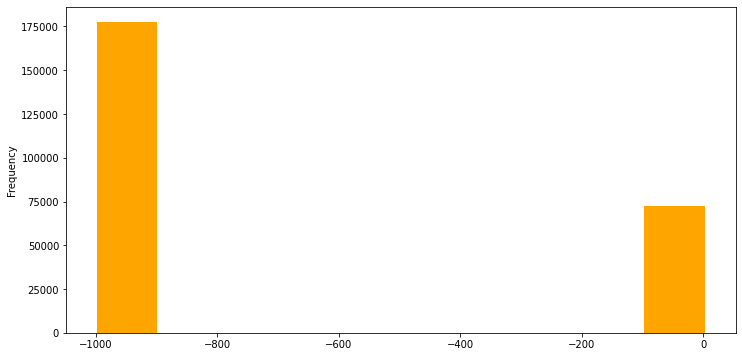

Histogram plot of PRI_jet_all_pt


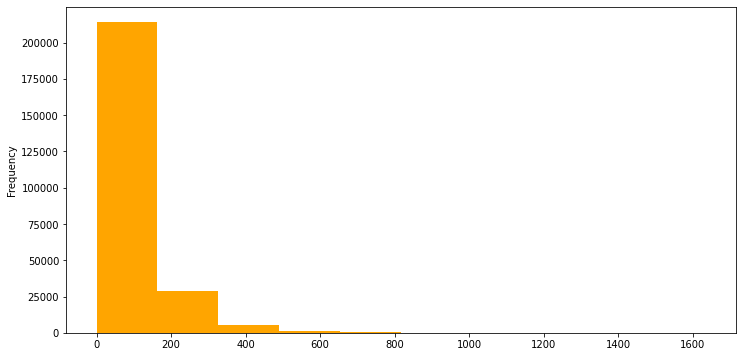

Histogram plot of Weight


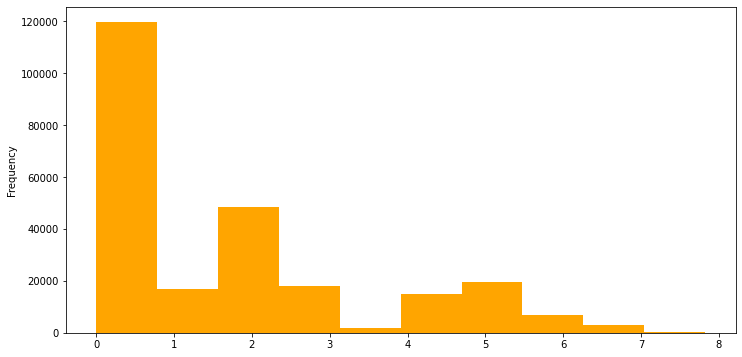

In [4]:
#declare global variables 
tot_cols_to_plot=[elem for elem in higgsboson.columns.tolist() if elem not in ("EventId", "Label")] 
unq_labels= higgsboson.Label.unique()

for i in range(len(tot_cols_to_plot)):
    print("Histogram plot of " + tot_cols_to_plot[i])
    figure = plt.figure(figsize=(12,6))
    plt.hist(higgsboson[tot_cols_to_plot[i]], stacked = True, bins = 10, color = ['orange'])
    plt.ylabel('Frequency')
    plt.show()

##  Two Histogram plots for each feature

Two histograms for a feature, each corresponding to a class-wise subset of data.


Histogram plots of features in subset Higgs Boson Data with label - s
Histogram plot of DER_mass_MMC


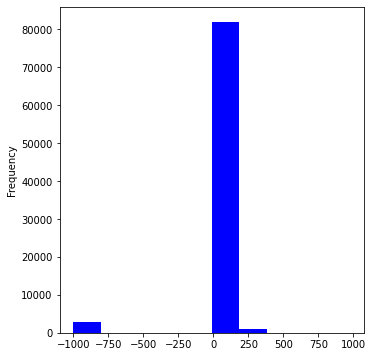


Histogram plots of features in subset Higgs Boson Data with label - b
Histogram plot of DER_mass_MMC


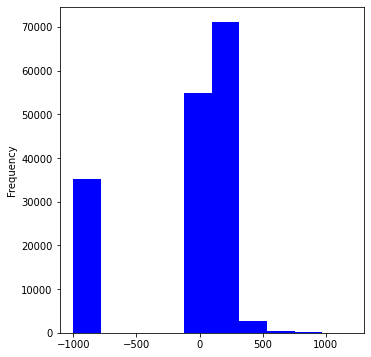


Histogram plots of features in subset Higgs Boson Data with label - s
Histogram plot of DER_mass_transverse_met_lep


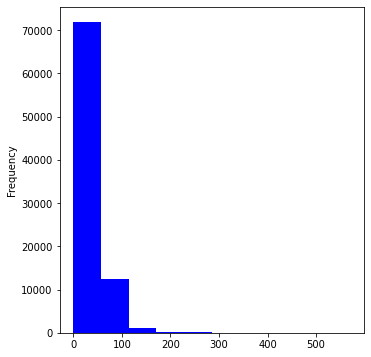


Histogram plots of features in subset Higgs Boson Data with label - b
Histogram plot of DER_mass_transverse_met_lep


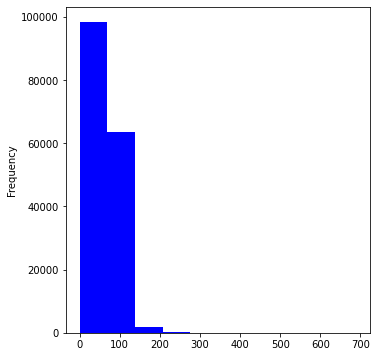


Histogram plots of features in subset Higgs Boson Data with label - s
Histogram plot of DER_mass_vis


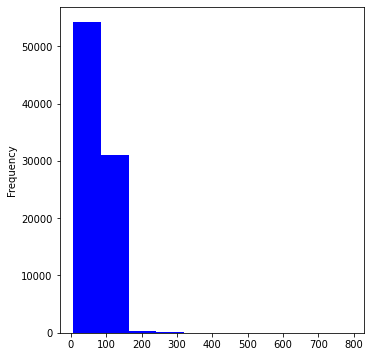


Histogram plots of features in subset Higgs Boson Data with label - b
Histogram plot of DER_mass_vis


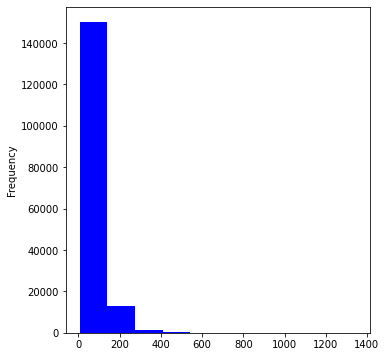


Histogram plots of features in subset Higgs Boson Data with label - s
Histogram plot of DER_pt_h


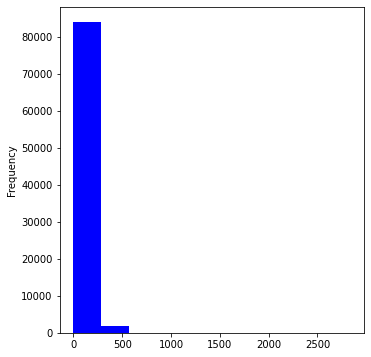


Histogram plots of features in subset Higgs Boson Data with label - b
Histogram plot of DER_pt_h


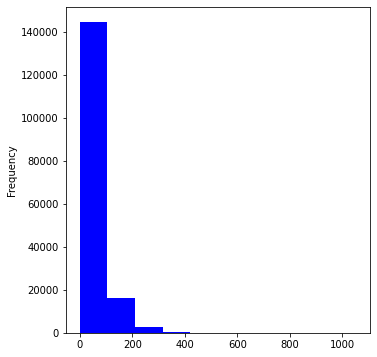


Histogram plots of features in subset Higgs Boson Data with label - s
Histogram plot of DER_deltaeta_jet_jet


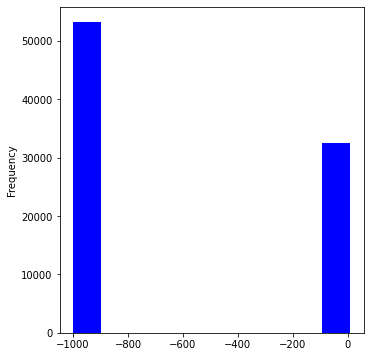


Histogram plots of features in subset Higgs Boson Data with label - b
Histogram plot of DER_deltaeta_jet_jet


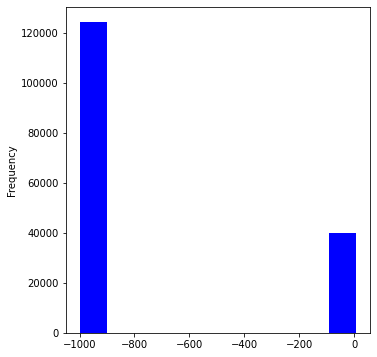


Histogram plots of features in subset Higgs Boson Data with label - s
Histogram plot of DER_mass_jet_jet


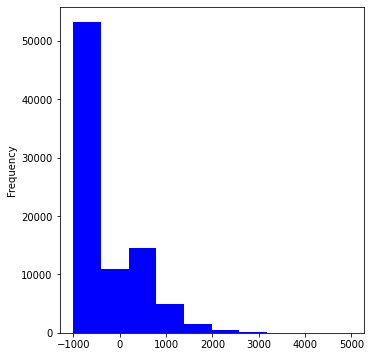


Histogram plots of features in subset Higgs Boson Data with label - b
Histogram plot of DER_mass_jet_jet


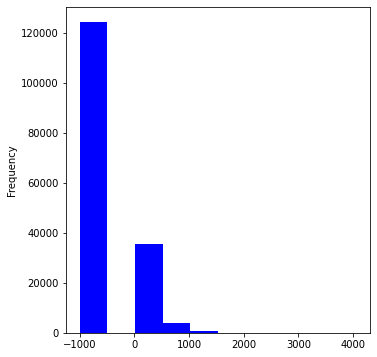


Histogram plots of features in subset Higgs Boson Data with label - s
Histogram plot of DER_prodeta_jet_jet


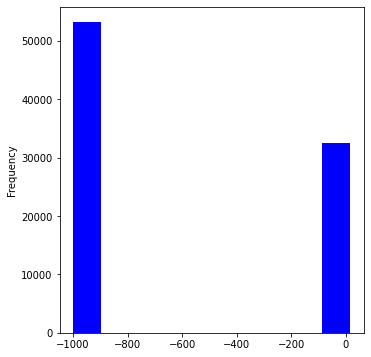


Histogram plots of features in subset Higgs Boson Data with label - b
Histogram plot of DER_prodeta_jet_jet


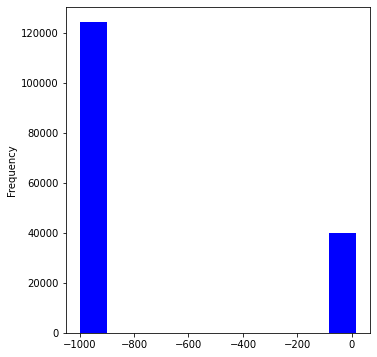


Histogram plots of features in subset Higgs Boson Data with label - s
Histogram plot of DER_deltar_tau_lep


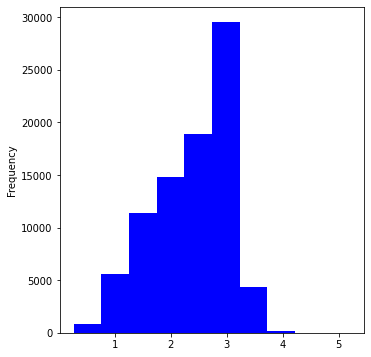


Histogram plots of features in subset Higgs Boson Data with label - b
Histogram plot of DER_deltar_tau_lep


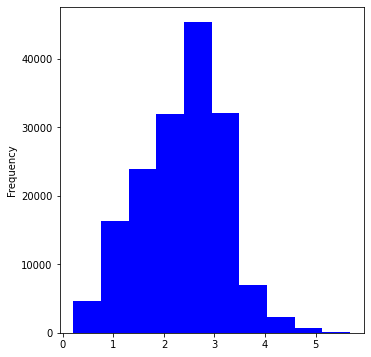


Histogram plots of features in subset Higgs Boson Data with label - s
Histogram plot of DER_pt_tot


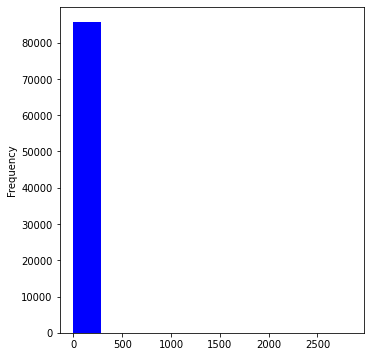


Histogram plots of features in subset Higgs Boson Data with label - b
Histogram plot of DER_pt_tot


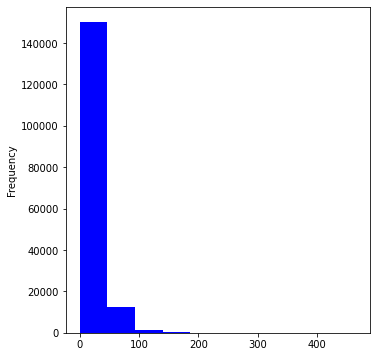


Histogram plots of features in subset Higgs Boson Data with label - s
Histogram plot of DER_sum_pt


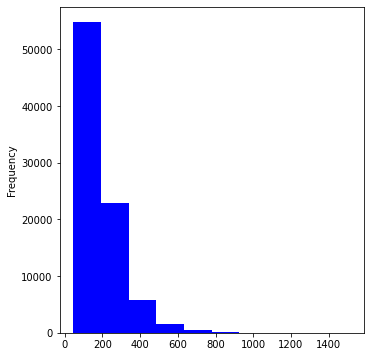


Histogram plots of features in subset Higgs Boson Data with label - b
Histogram plot of DER_sum_pt


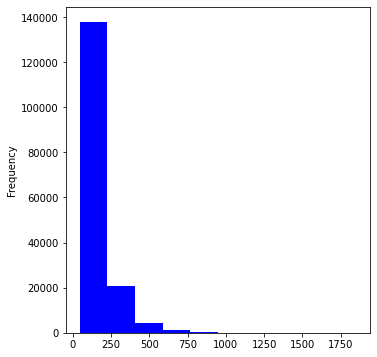


Histogram plots of features in subset Higgs Boson Data with label - s
Histogram plot of DER_pt_ratio_lep_tau


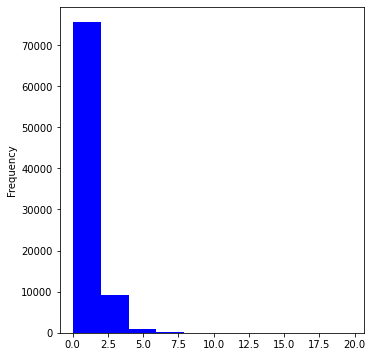


Histogram plots of features in subset Higgs Boson Data with label - b
Histogram plot of DER_pt_ratio_lep_tau


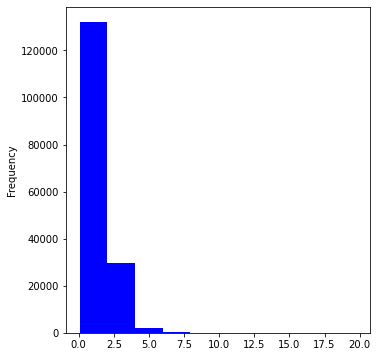


Histogram plots of features in subset Higgs Boson Data with label - s
Histogram plot of DER_met_phi_centrality


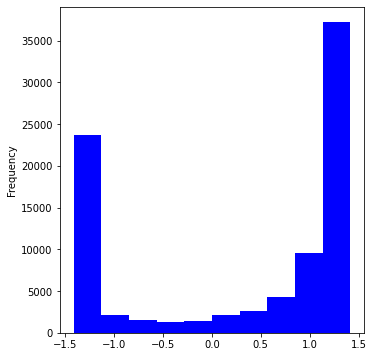


Histogram plots of features in subset Higgs Boson Data with label - b
Histogram plot of DER_met_phi_centrality


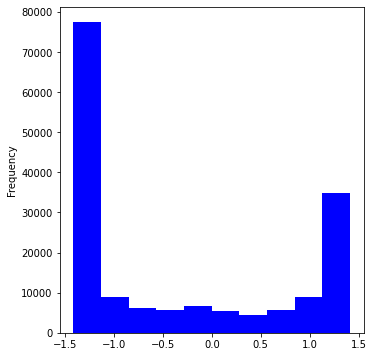


Histogram plots of features in subset Higgs Boson Data with label - s
Histogram plot of DER_lep_eta_centrality


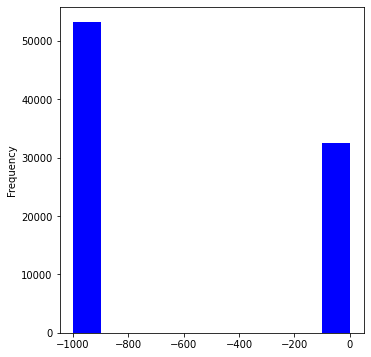


Histogram plots of features in subset Higgs Boson Data with label - b
Histogram plot of DER_lep_eta_centrality


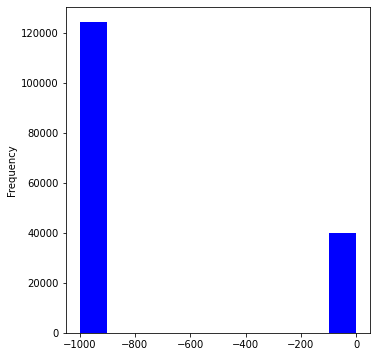


Histogram plots of features in subset Higgs Boson Data with label - s
Histogram plot of PRI_tau_pt


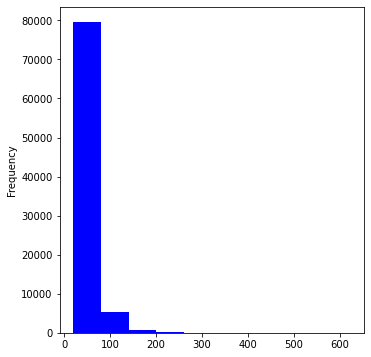


Histogram plots of features in subset Higgs Boson Data with label - b
Histogram plot of PRI_tau_pt


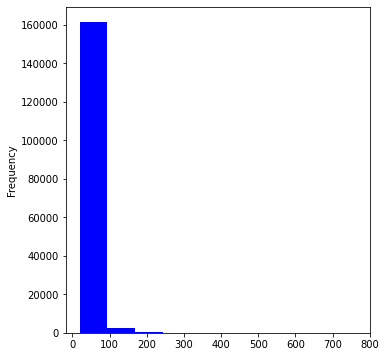


Histogram plots of features in subset Higgs Boson Data with label - s
Histogram plot of PRI_tau_eta


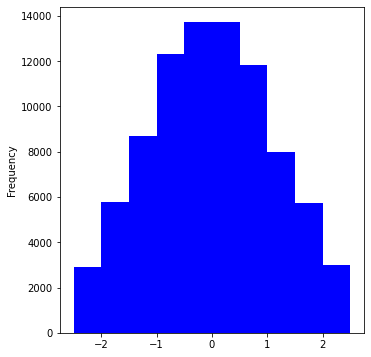


Histogram plots of features in subset Higgs Boson Data with label - b
Histogram plot of PRI_tau_eta


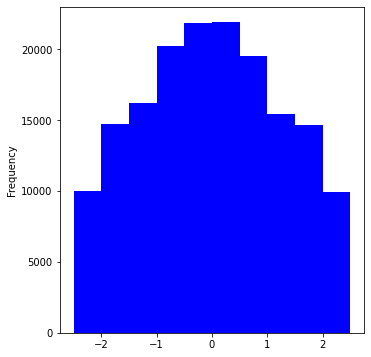


Histogram plots of features in subset Higgs Boson Data with label - s
Histogram plot of PRI_tau_phi


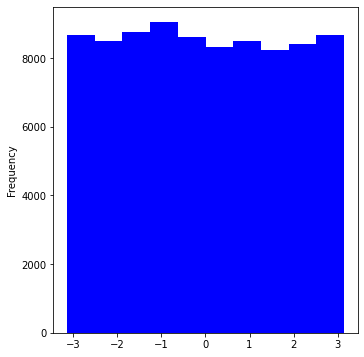


Histogram plots of features in subset Higgs Boson Data with label - b
Histogram plot of PRI_tau_phi


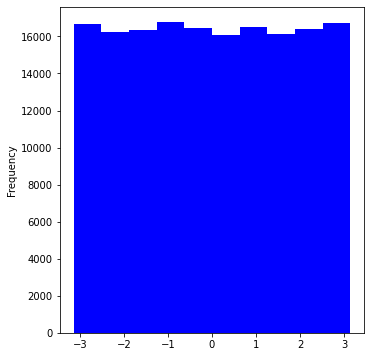


Histogram plots of features in subset Higgs Boson Data with label - s
Histogram plot of PRI_lep_pt


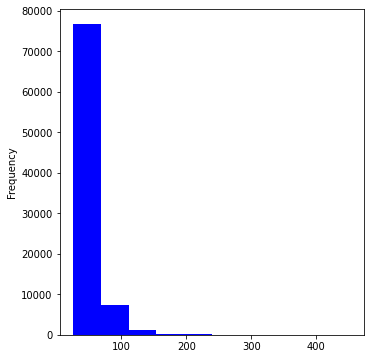


Histogram plots of features in subset Higgs Boson Data with label - b
Histogram plot of PRI_lep_pt


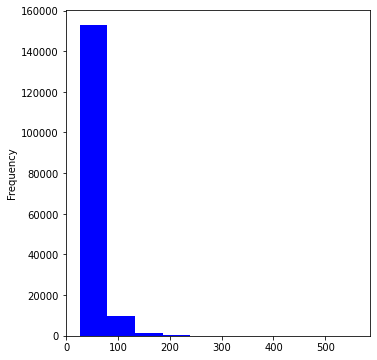


Histogram plots of features in subset Higgs Boson Data with label - s
Histogram plot of PRI_lep_eta


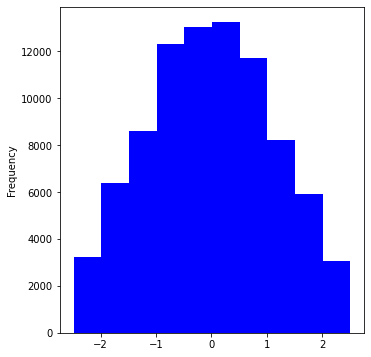


Histogram plots of features in subset Higgs Boson Data with label - b
Histogram plot of PRI_lep_eta


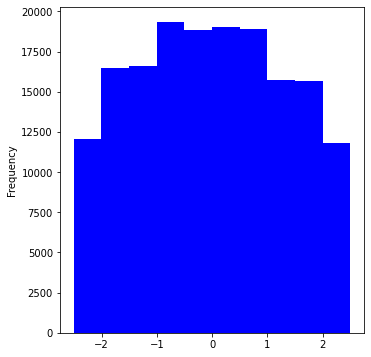


Histogram plots of features in subset Higgs Boson Data with label - s
Histogram plot of PRI_lep_phi


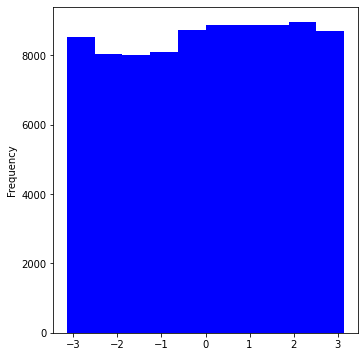


Histogram plots of features in subset Higgs Boson Data with label - b
Histogram plot of PRI_lep_phi


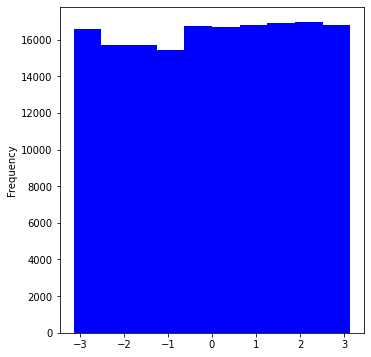


Histogram plots of features in subset Higgs Boson Data with label - s
Histogram plot of PRI_met


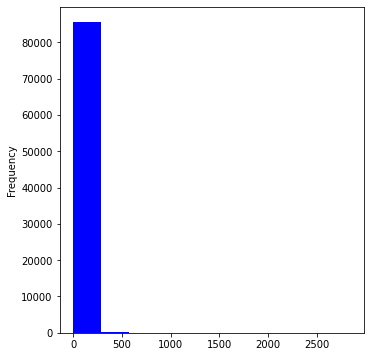


Histogram plots of features in subset Higgs Boson Data with label - b
Histogram plot of PRI_met


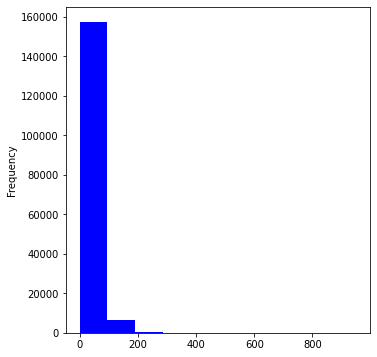


Histogram plots of features in subset Higgs Boson Data with label - s
Histogram plot of PRI_met_phi


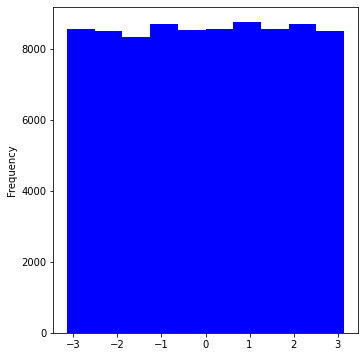


Histogram plots of features in subset Higgs Boson Data with label - b
Histogram plot of PRI_met_phi


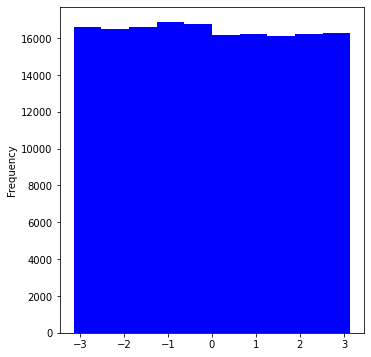


Histogram plots of features in subset Higgs Boson Data with label - s
Histogram plot of PRI_met_sumet


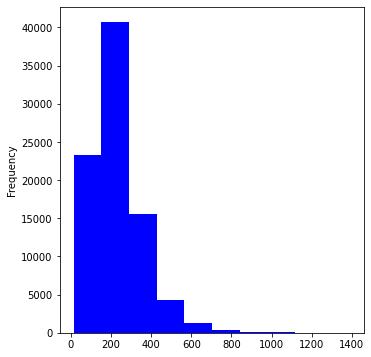


Histogram plots of features in subset Higgs Boson Data with label - b
Histogram plot of PRI_met_sumet


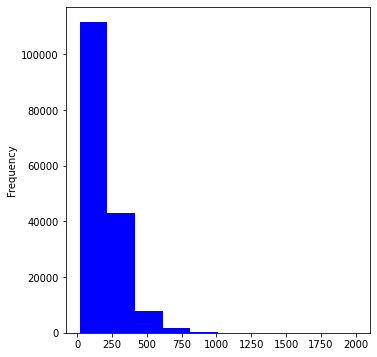


Histogram plots of features in subset Higgs Boson Data with label - s
Histogram plot of PRI_jet_num


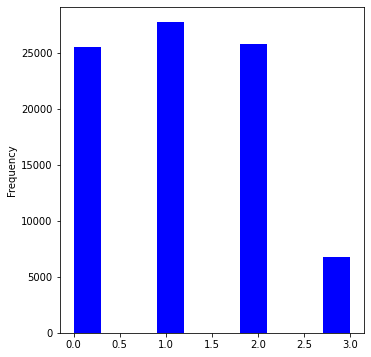


Histogram plots of features in subset Higgs Boson Data with label - b
Histogram plot of PRI_jet_num


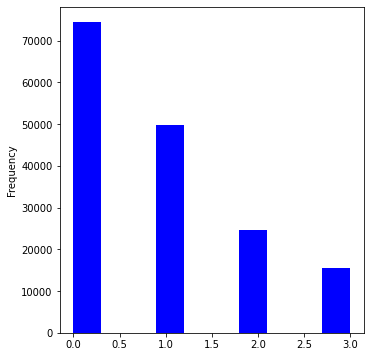


Histogram plots of features in subset Higgs Boson Data with label - s
Histogram plot of PRI_jet_leading_pt


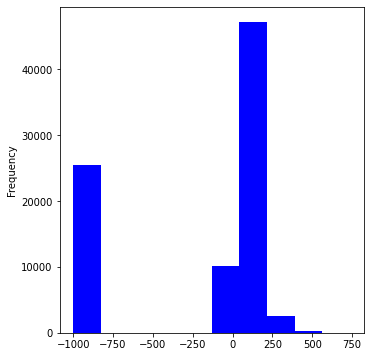


Histogram plots of features in subset Higgs Boson Data with label - b
Histogram plot of PRI_jet_leading_pt


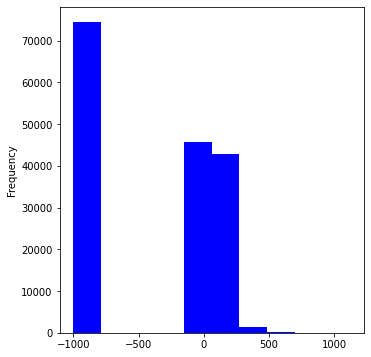


Histogram plots of features in subset Higgs Boson Data with label - s
Histogram plot of PRI_jet_leading_eta


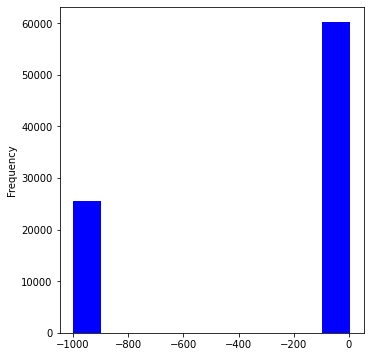


Histogram plots of features in subset Higgs Boson Data with label - b
Histogram plot of PRI_jet_leading_eta


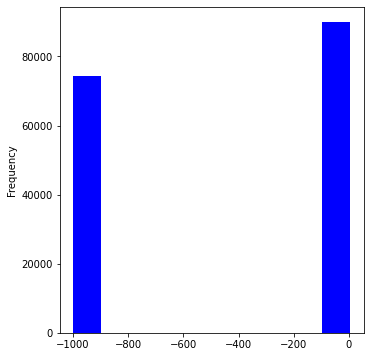


Histogram plots of features in subset Higgs Boson Data with label - s
Histogram plot of PRI_jet_leading_phi


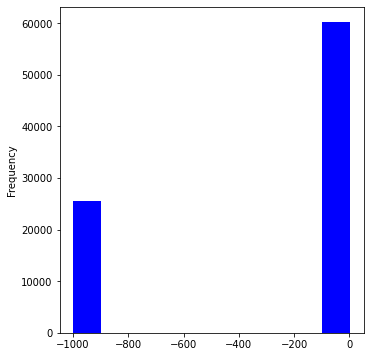


Histogram plots of features in subset Higgs Boson Data with label - b
Histogram plot of PRI_jet_leading_phi


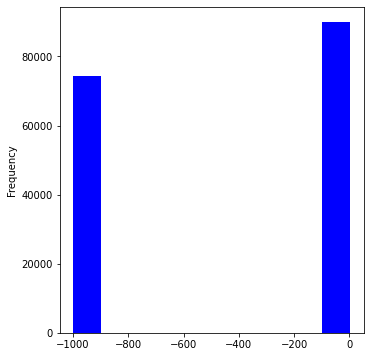


Histogram plots of features in subset Higgs Boson Data with label - s
Histogram plot of PRI_jet_subleading_pt


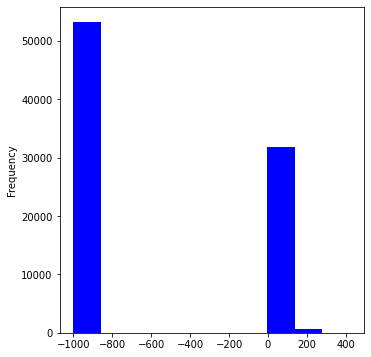


Histogram plots of features in subset Higgs Boson Data with label - b
Histogram plot of PRI_jet_subleading_pt


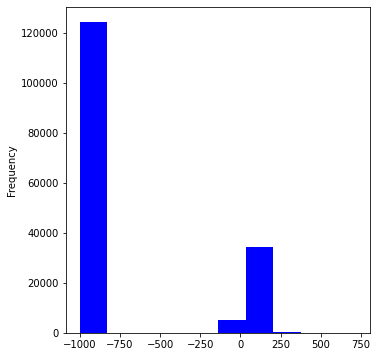


Histogram plots of features in subset Higgs Boson Data with label - s
Histogram plot of PRI_jet_subleading_eta


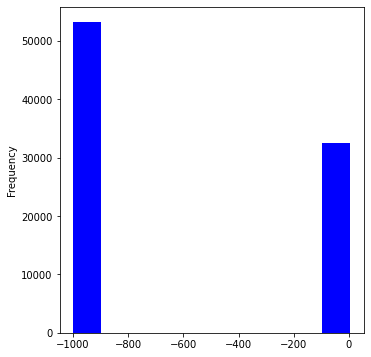


Histogram plots of features in subset Higgs Boson Data with label - b
Histogram plot of PRI_jet_subleading_eta


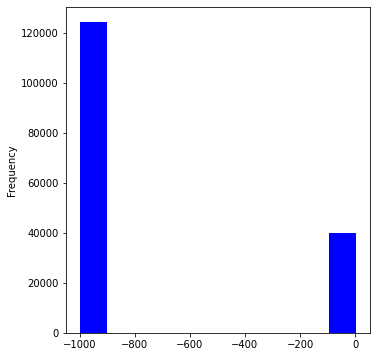


Histogram plots of features in subset Higgs Boson Data with label - s
Histogram plot of PRI_jet_subleading_phi


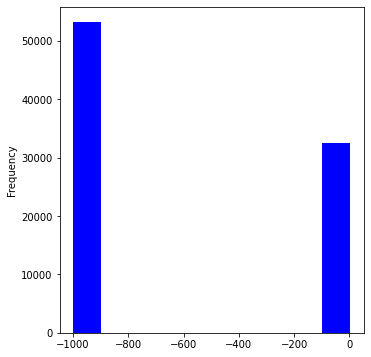


Histogram plots of features in subset Higgs Boson Data with label - b
Histogram plot of PRI_jet_subleading_phi


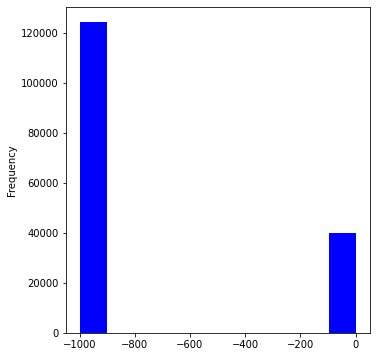


Histogram plots of features in subset Higgs Boson Data with label - s
Histogram plot of PRI_jet_all_pt


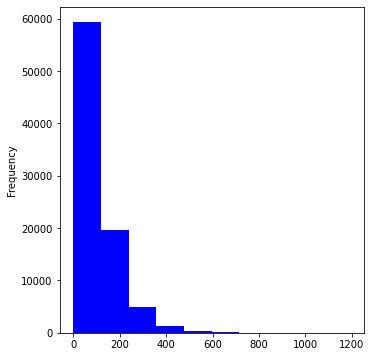


Histogram plots of features in subset Higgs Boson Data with label - b
Histogram plot of PRI_jet_all_pt


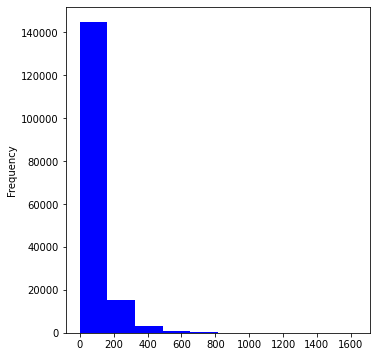


Histogram plots of features in subset Higgs Boson Data with label - s
Histogram plot of Weight


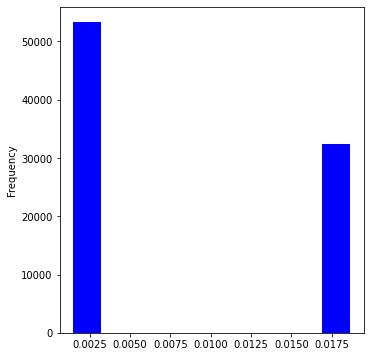


Histogram plots of features in subset Higgs Boson Data with label - b
Histogram plot of Weight


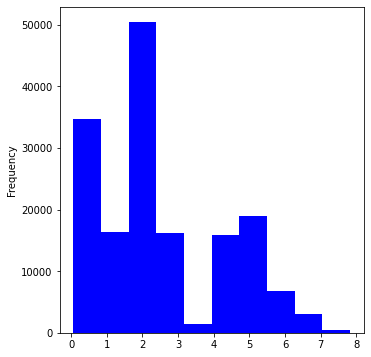

In [5]:
for col in range(len(tot_cols_to_plot)):
    for i in range(len(unq_labels)):
        plt.subplots(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        subset_higgs_boson_data =  higgsboson[higgsboson['Label'] == unq_labels[i]]
        print("\nHistogram plots of features in subset Higgs Boson Data with label - " + subset_higgs_boson_data['Label'].unique()[0])
        print("Histogram plot of " + tot_cols_to_plot[col])
        plt.hist(subset_higgs_boson_data[tot_cols_to_plot[col]], 
                 stacked = True, 
                 bins = 10,
                 color = ['blue'])
        plt.ylabel('Frequency')
        plt.show()

##  One Histogram plot for each feature

One histogram for a feature corresponds to a plot of a class-wise subset of data with colour labels for each class.


Histogram plots of features in subset of Higgs Boson Data with labels s and b
Histogram plot of DER_mass_MMC


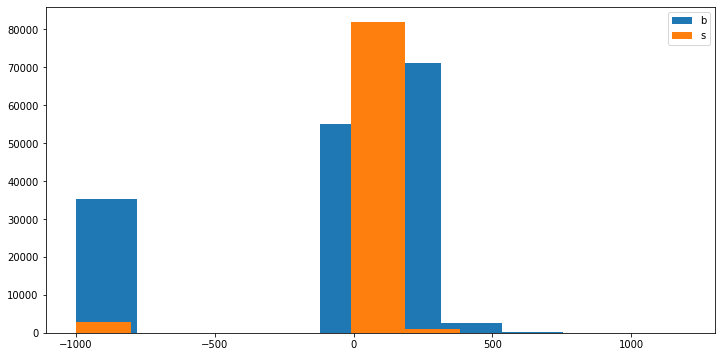


Histogram plots of features in subset of Higgs Boson Data with labels s and b
Histogram plot of DER_mass_transverse_met_lep


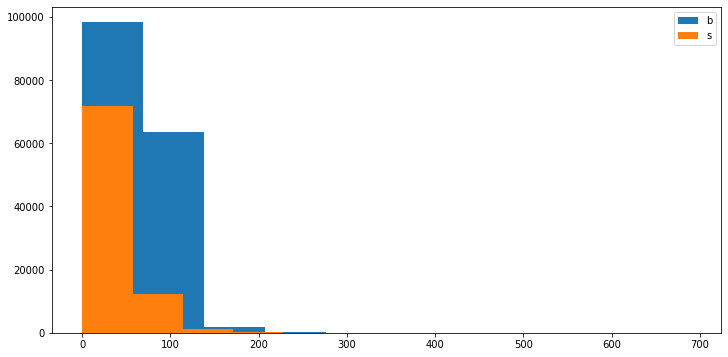


Histogram plots of features in subset of Higgs Boson Data with labels s and b
Histogram plot of DER_mass_vis


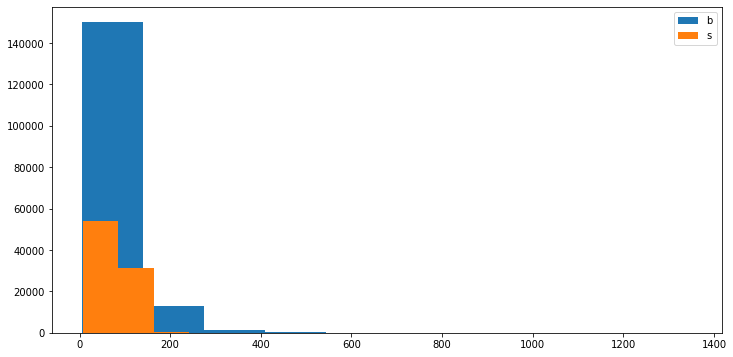


Histogram plots of features in subset of Higgs Boson Data with labels s and b
Histogram plot of DER_pt_h


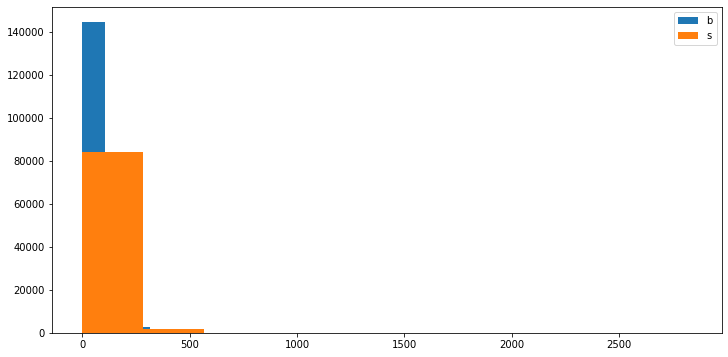


Histogram plots of features in subset of Higgs Boson Data with labels s and b
Histogram plot of DER_deltaeta_jet_jet


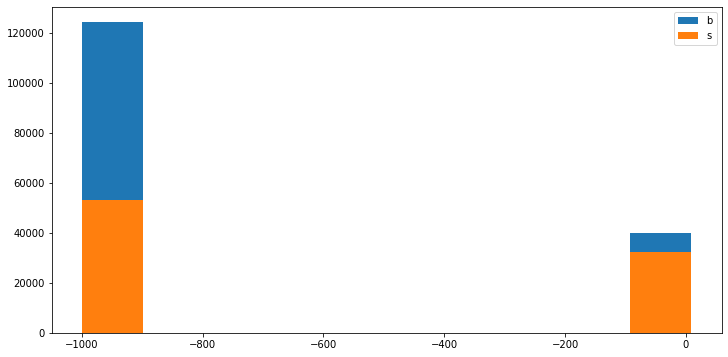


Histogram plots of features in subset of Higgs Boson Data with labels s and b
Histogram plot of DER_mass_jet_jet


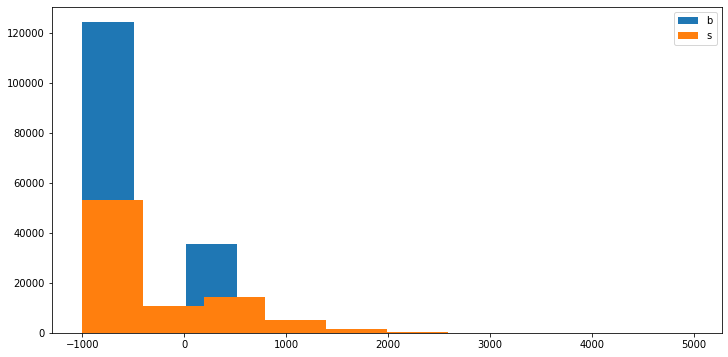


Histogram plots of features in subset of Higgs Boson Data with labels s and b
Histogram plot of DER_prodeta_jet_jet


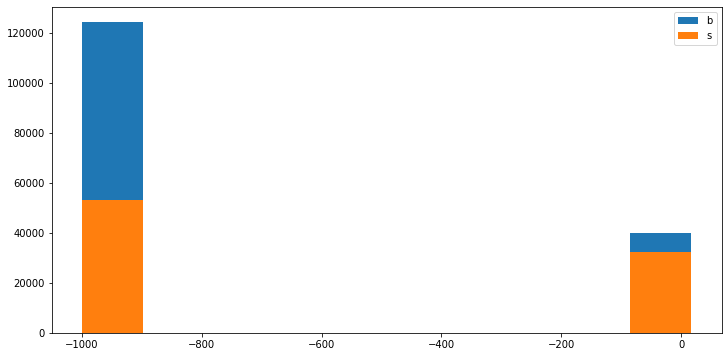


Histogram plots of features in subset of Higgs Boson Data with labels s and b
Histogram plot of DER_deltar_tau_lep


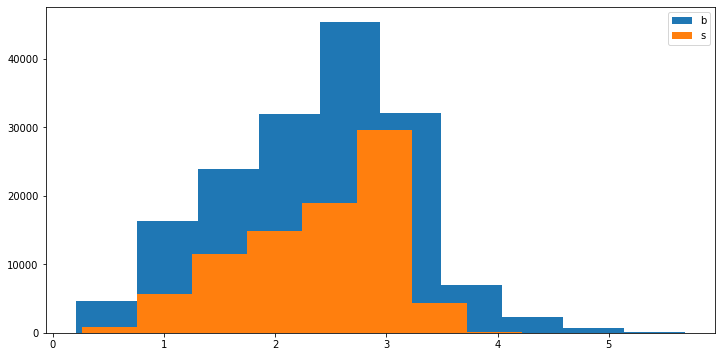


Histogram plots of features in subset of Higgs Boson Data with labels s and b
Histogram plot of DER_pt_tot


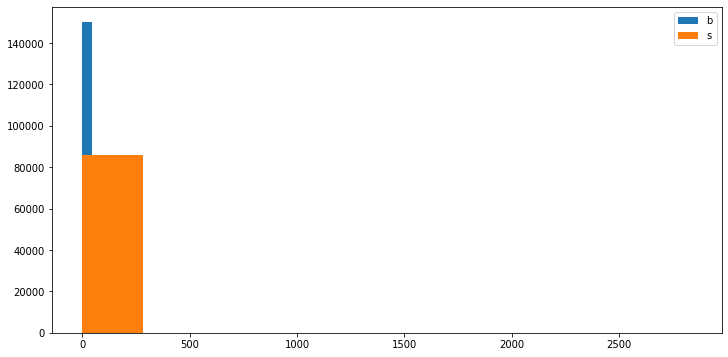


Histogram plots of features in subset of Higgs Boson Data with labels s and b
Histogram plot of DER_sum_pt


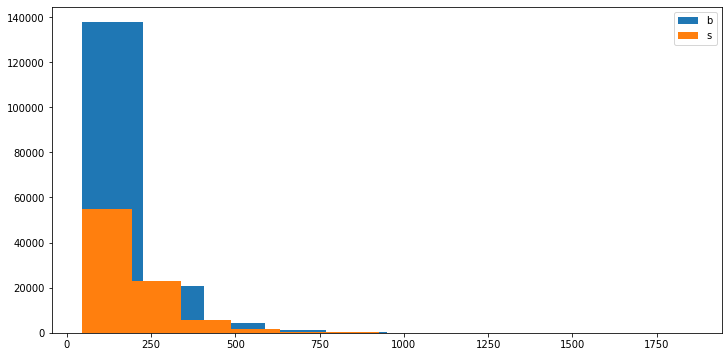


Histogram plots of features in subset of Higgs Boson Data with labels s and b
Histogram plot of DER_pt_ratio_lep_tau


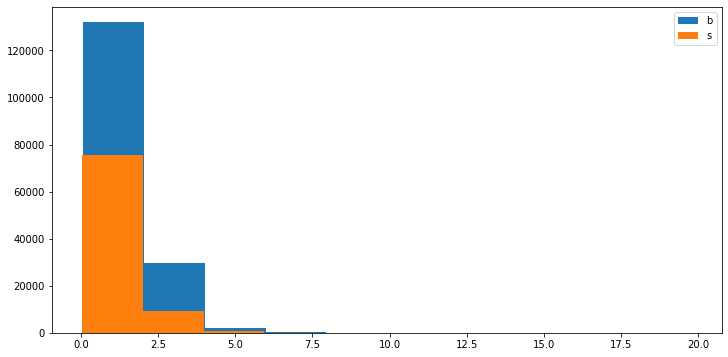


Histogram plots of features in subset of Higgs Boson Data with labels s and b
Histogram plot of DER_met_phi_centrality


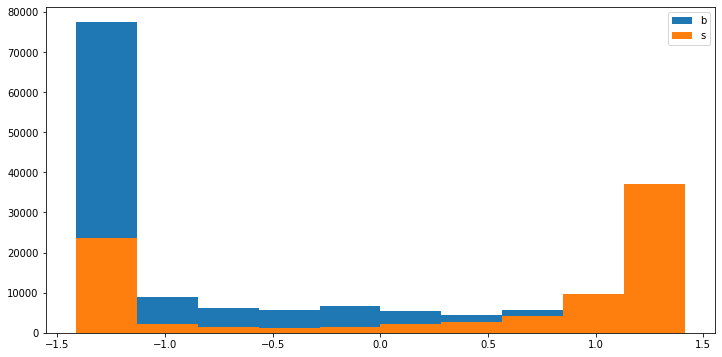


Histogram plots of features in subset of Higgs Boson Data with labels s and b
Histogram plot of DER_lep_eta_centrality


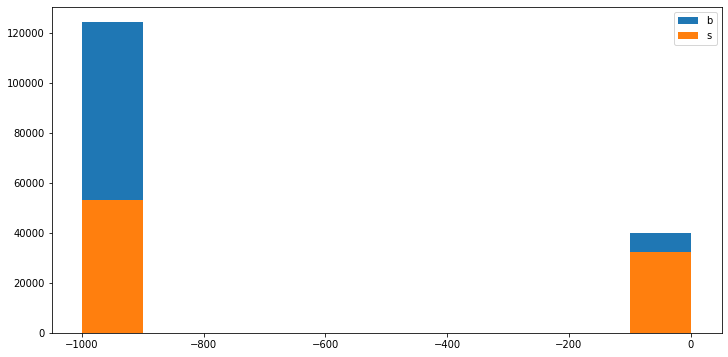


Histogram plots of features in subset of Higgs Boson Data with labels s and b
Histogram plot of PRI_tau_pt


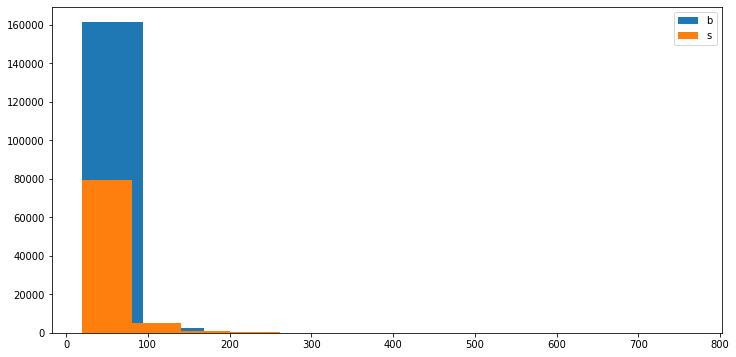


Histogram plots of features in subset of Higgs Boson Data with labels s and b
Histogram plot of PRI_tau_eta


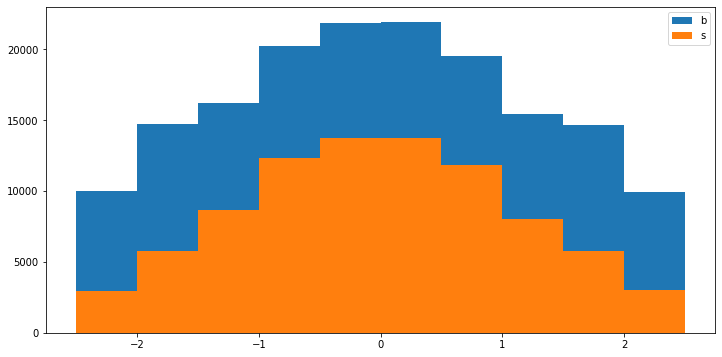


Histogram plots of features in subset of Higgs Boson Data with labels s and b
Histogram plot of PRI_tau_phi


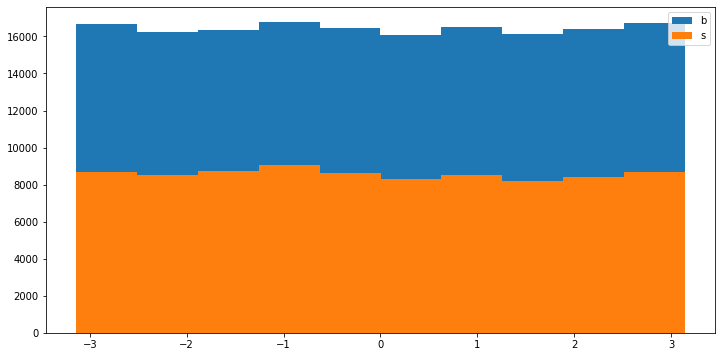


Histogram plots of features in subset of Higgs Boson Data with labels s and b
Histogram plot of PRI_lep_pt


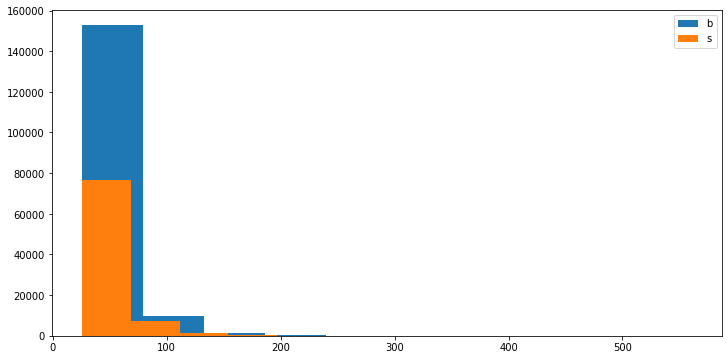


Histogram plots of features in subset of Higgs Boson Data with labels s and b
Histogram plot of PRI_lep_eta


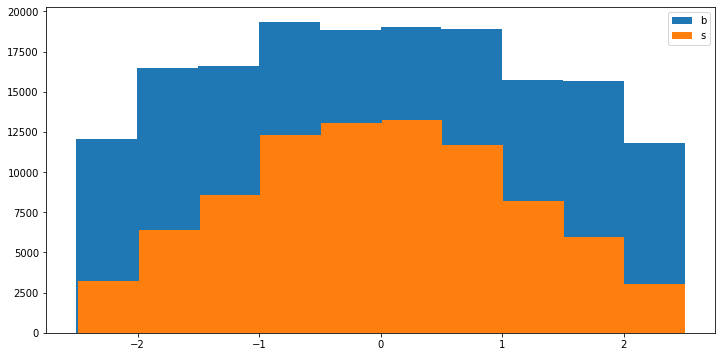


Histogram plots of features in subset of Higgs Boson Data with labels s and b
Histogram plot of PRI_lep_phi


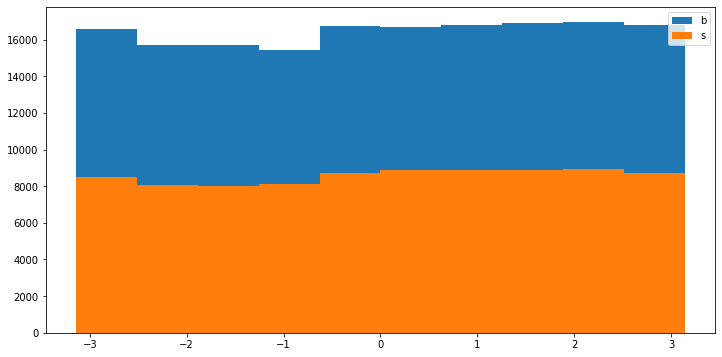


Histogram plots of features in subset of Higgs Boson Data with labels s and b
Histogram plot of PRI_met


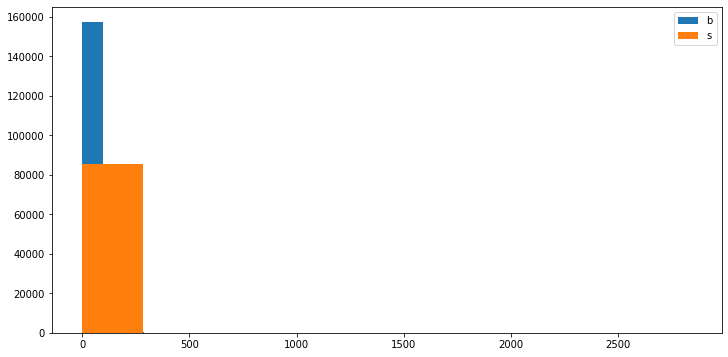


Histogram plots of features in subset of Higgs Boson Data with labels s and b
Histogram plot of PRI_met_phi


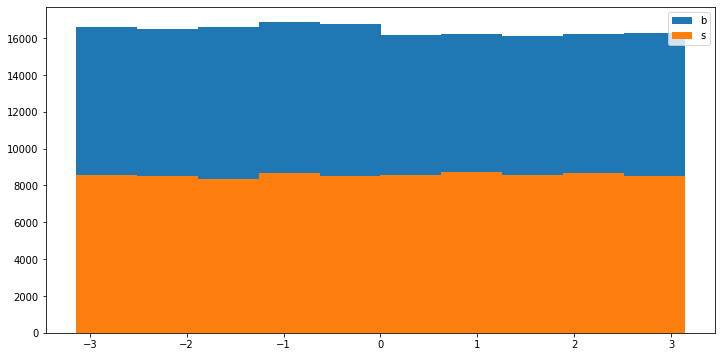


Histogram plots of features in subset of Higgs Boson Data with labels s and b
Histogram plot of PRI_met_sumet


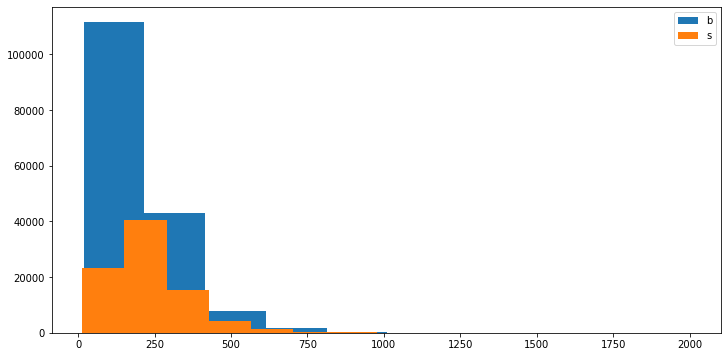


Histogram plots of features in subset of Higgs Boson Data with labels s and b
Histogram plot of PRI_jet_num


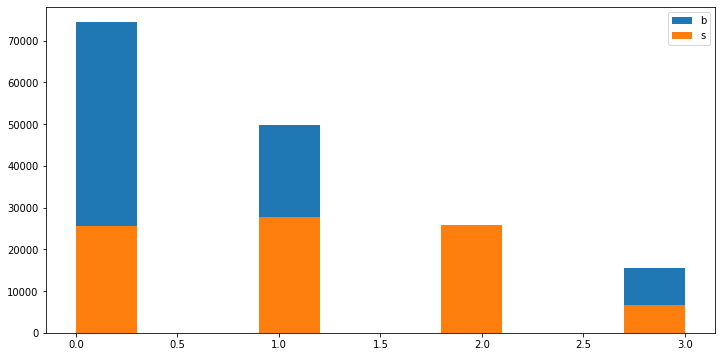


Histogram plots of features in subset of Higgs Boson Data with labels s and b
Histogram plot of PRI_jet_leading_pt


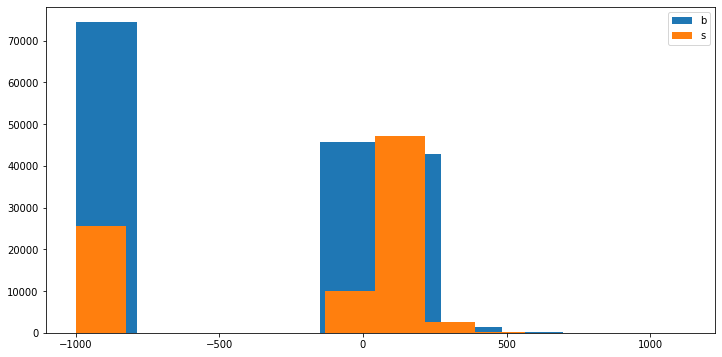


Histogram plots of features in subset of Higgs Boson Data with labels s and b
Histogram plot of PRI_jet_leading_eta


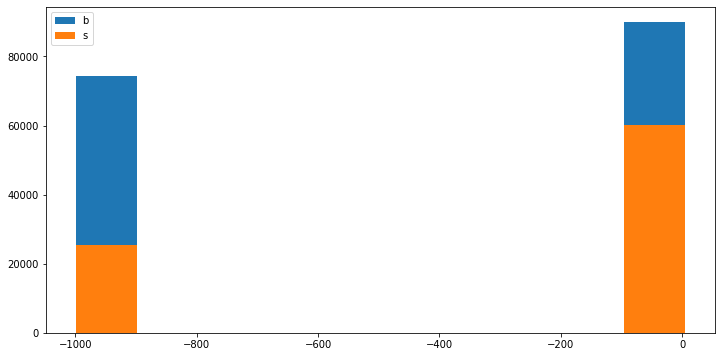


Histogram plots of features in subset of Higgs Boson Data with labels s and b
Histogram plot of PRI_jet_leading_phi


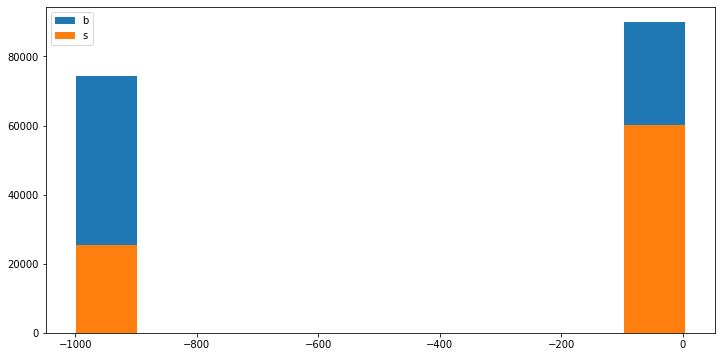


Histogram plots of features in subset of Higgs Boson Data with labels s and b
Histogram plot of PRI_jet_subleading_pt


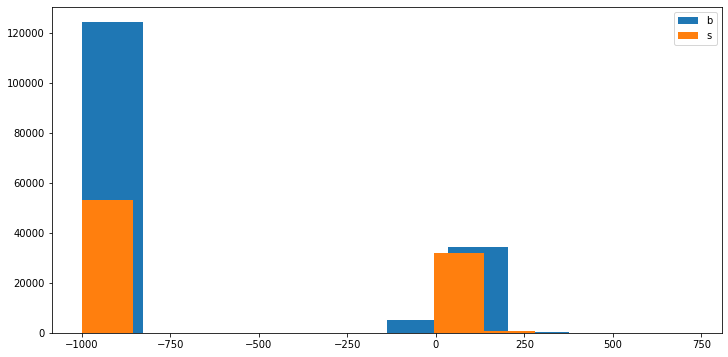


Histogram plots of features in subset of Higgs Boson Data with labels s and b
Histogram plot of PRI_jet_subleading_eta


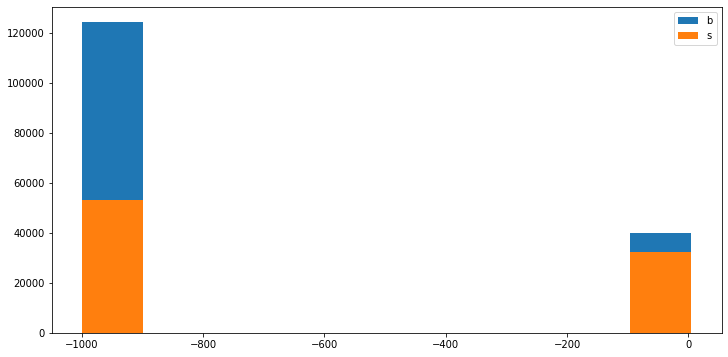


Histogram plots of features in subset of Higgs Boson Data with labels s and b
Histogram plot of PRI_jet_subleading_phi


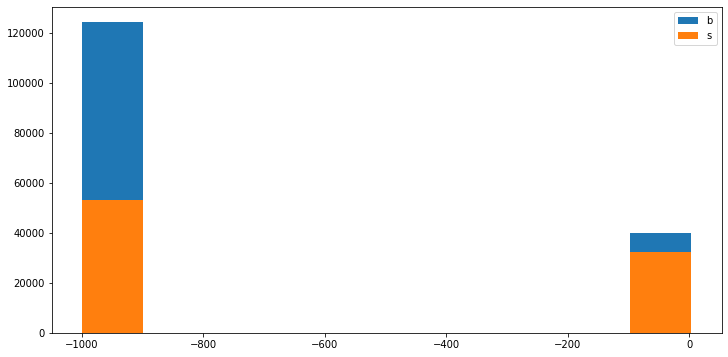


Histogram plots of features in subset of Higgs Boson Data with labels s and b
Histogram plot of PRI_jet_all_pt


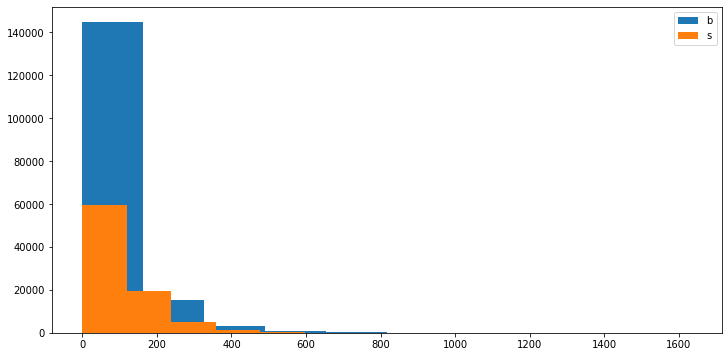


Histogram plots of features in subset of Higgs Boson Data with labels s and b
Histogram plot of Weight


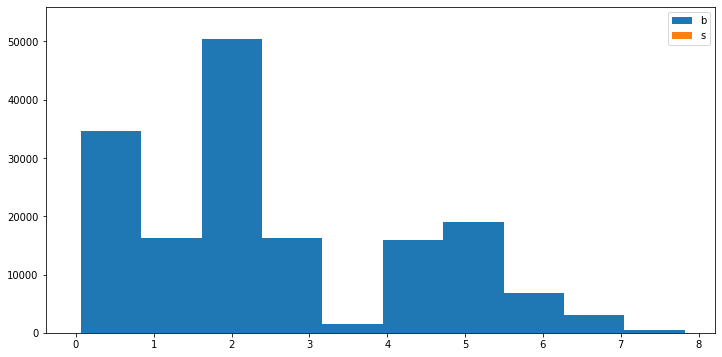

In [6]:
for col in range(len(tot_cols_to_plot)):
    higgs_boson_grpby_lbls = higgsboson.groupby('Label', as_index = False, level = None, axis = 0)
    print("\nHistogram plots of features in subset of Higgs Boson Data with labels {} and {}".format(unq_labels[0], unq_labels[1])) 
    print("Histogram plot of " + tot_cols_to_plot[col])
    fig, ax = plt.subplots(figsize=(12,6))
    for key, val in higgs_boson_grpby_lbls:
        
        plt.hist(val[tot_cols_to_plot[col]],
                     stacked = True, 
                     bins = 10,linewidth=2, linestyle=':',
                     label=key)
    ax.legend()
    plt.show()


Most of the features in the above figures have different ranges and are not normally distributed. If we try to compute the distance between these features, it could lead to false interpretations because of the outliers and the data is not normalized. 
<br>
In the following steps, we will take the logarithm of each feature and observe the distribution of data points. 
<br>
Before proceeding with the log (feature), we will first determine the dimensions in the Higgs boson data that require log transformation. For this, we will compute the skewness measure of each feature and pick features whose skewness is high and not equal to zero. The normal distribution has a skewness of zero. If skewness is positive, the tail on the right side of the distribution will be longer. If skewness is negative, the tail on the left side will be longer.

**Let's get started to see features that require log transformation, and and interpret the results from the plot!** 

In [7]:
# Compute Skewness of each Feature in the Higgs Boson data-
skewness_hb = higgsboson.skew(axis = 0, skipna = True) 
skewness_hb = pd.DataFrame(skewness_hb , columns = ['skewness'])
skewness_hb = skewness_hb.reset_index()
skewness_hb.columns = ['Feature', 'Skewness']

#Considering highly skewed variables for log transformation . 
#Please note that condition can also be applied on other threshold values instead of -1 and +1. We are choosing -1 and +1 below-

features_for_logtransformation = skewness_hb[(skewness_hb['Skewness'] > 1) | (skewness_hb['Skewness'] < -1) ]  
print("Features with high skewness will be considered for log transformation:")
print(features_for_logtransformation )


Features with high skewness will be considered for log transformation:
                        Feature   Skewness
1                  DER_mass_MMC  -1.854718
2   DER_mass_transverse_met_lep   1.219211
3                  DER_mass_vis   3.790262
4                      DER_pt_h   2.541885
6              DER_mass_jet_jet   1.409407
9                    DER_pt_tot  10.579309
10                   DER_sum_pt   2.320647
11         DER_pt_ratio_lep_tau   2.633521
14                   PRI_tau_pt   3.755191
17                   PRI_lep_pt   3.240762
20                      PRI_met   5.270755
22                PRI_met_sumet   1.849445
30               PRI_jet_all_pt   2.379556


# Log Transformation of the Features

Let us consider any two features from the above list of features, such as `DER_mass_MMC` and `DER_mass_transverse_met_lep`, and create a scatter plot between them before taking logarithm and after taking the logarithm of these features. 


## Scatter Plot between "DER_mass_MMC" and "DER_mass_transverse_met_lep"  -without log (feature)

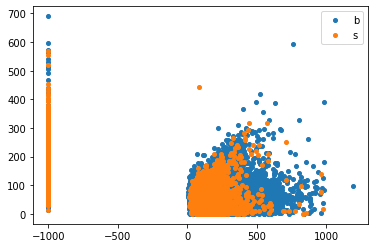

In [8]:
groupbylabels = higgsboson.groupby('Label', as_index = False, level = None, axis = 0)
fig, ax = plt.subplots()
for key, val in groupbylabels:
    ax.plot(val[tot_cols_to_plot[0]], 
            val[tot_cols_to_plot[1]],
            marker='.',
            linestyle= '',
            markersize =8, 
            label=key)
    
ax.legend()
plt.show()

## Scatter Plot between "DER_mass_MMC" and "DER_mass_transverse_met_lep"  - with log (feature)

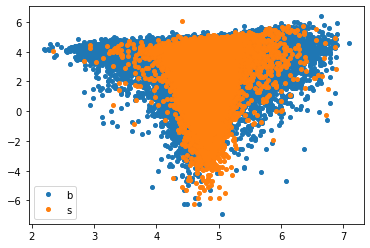

In [9]:
higgsboson['log_DER_mass_MMC'] =np.log(higgsboson[tot_cols_to_plot[0]])
higgsboson['log_DER_mass_transverse_met_lep'] =np.log(higgsboson[tot_cols_to_plot[1]])
groupbylabels = higgsboson.groupby('Label', as_index = False, level = None, axis = 0)
fig, ax = plt.subplots()
for key, val in groupbylabels:
    ax.plot(val[higgsboson.columns[-2]], 
            val[higgsboson.columns[-1]],
            marker='.',
            linestyle= '',
            markersize =8, 
            label=key)
    
ax.legend()
plt.show()

**It is clearly evident from the above plot (i.e., when we take the log of features) that there is some covariance between "DER_mass_MMC" and  "DER_mass_transverse_met_lep" which was not present in normal case. The log(feature) scaled down the outliers and visualization has improved.
Without log, we were not able to observe the correlation/covariance between these two features and the data cloud was spherical (i.e. no correlation between the features/variables).
<br>
However, post log transformation, we see that both the features show little positive correlation for class label "b" than class label "s".** 